In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from pandas import DataFrame
import sklearn
from pandas import DataFrame
import scikitplot as skplt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
svm=LinearSVC()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
gnb=GaussianNB()

In [2]:
import matplotlib as mt
axes= {"linewidth" : 3}
mt.rc("axes", **axes)
font={"weight": 'bold', "family": "Times new roman", "size": 20}
mt.rc("font", **font)

In [3]:
from imblearn.over_sampling import ADASYN

In [4]:
dataset=pd.read_excel("Combined data.xlsx")
dataset

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,AIC,ΔP-rad,Phase formation
0,2.629500,0.437500,0.9280,0.063086,1.12,13.38,18.186440,2.01000,Single phase
1,2.624000,0.437500,0.9220,0.063086,-0.16,13.38,18.038570,1.99300,Single phase
2,2.543300,0.482759,0.9640,0.026537,-3.84,13.38,18.688520,1.96000,Single phase
3,2.533000,0.451613,1.0120,0.046064,-3.52,13.38,19.836200,2.02600,Single phase
4,2.629800,0.451613,1.0040,0.047429,-3.84,13.38,19.650520,1.98400,Single phase
...,...,...,...,...,...,...,...,...,...
287,2.099125,0.378378,0.7175,0.153609,-42.75,11.52,13.939362,2.02875,Multi phase
288,2.321625,0.500000,0.6550,0.030428,-22.25,11.52,12.309975,1.78625,Multi phase
289,2.414375,0.500000,0.6900,0.015890,-3.50,11.52,13.056875,1.87625,Multi phase
290,2.279875,0.482759,0.4825,0.040656,-6.00,11.52,8.866862,1.93000,Multi phase


In [5]:
x=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y=dataset[["Phase formation"]]
y

,Phase formation
0,Single phase
1,Single phase
2,Single phase
3,Single phase
4,Single phase
...,...
287,Multi phase
288,Multi phase
289,Multi phase
290,Multi phase


In [6]:
x_train, x_test1,  y_train, y_test1=train_test_split(x, y, test_size=0.25, random_state=42)
train_set1=pd.concat([x_train, y_train], axis=1)
train_set1
test_set1=pd.concat([x_test1, y_test1], axis=1)
test_set1
train_set1

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,Phase formation
68,2.789700,0.378378,1.126,0.106109,-1.28,13.38,Single phase
209,2.144100,0.378378,0.818,0.122829,-33.12,13.38,Multi phase
37,2.554400,0.451613,1.072,0.040541,-3.36,13.38,Single phase
16,2.730500,0.437500,1.002,0.060964,-1.60,13.38,Single phase
289,2.414375,0.500000,0.690,0.015890,-3.50,11.52,Multi phase
...,...,...,...,...,...,...,...
188,2.401600,0.482759,0.700,0.036949,-19.68,13.38,Multi phase
71,2.571000,0.451613,0.924,0.046064,-2.24,13.38,Single phase
106,2.726300,0.378378,1.020,0.128073,-2.08,13.38,Single phase
270,2.657500,0.437500,1.040,0.064511,2.25,11.52,Single phase


In [ ]:
df=pd.concat([x_train1, y_train1], axis=1)
df

In [ ]:
x=x_train1
x

In [ ]:
df.groupby('Phase formation').size()

In [ ]:
ada = ADASYN()
x_train1, y_train1 = ada.fit_resample(x_train, y_train)
df=pd.concat([x_train1, y_train1], axis=1)
df

In [ ]:
x_train1

In [6]:
Tr=pd.read_excel("Final Training data after ADASYN.xlsx")
Tr

,Unnamed: 0,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,Phase formation,Formation
0,379,2.448854,0.451613,0.837572,0.052204,-6.300157,13.380000,Multi phase,0
1,408,2.552463,0.451613,0.920435,0.038085,-2.395537,11.619889,Multi phase,0
2,412,2.601827,0.451613,0.899097,0.045241,-4.251630,12.980012,Multi phase,0
3,209,2.144100,0.378378,0.818000,0.122829,-33.120000,13.380000,Multi phase,0
4,75,2.678000,0.437500,0.946000,0.063086,2.240000,13.380000,Single phase,1
...,...,...,...,...,...,...,...,...,...
331,374,2.487832,0.451613,0.845461,0.052434,-5.178440,13.380000,Multi phase,0
332,317,2.407351,0.395909,0.723546,0.117109,-4.817669,13.380000,Multi phase,0
333,143,2.576100,0.378378,0.922000,0.120437,-1.760000,13.380000,Single phase,1
334,318,2.371924,0.439498,0.714673,0.062097,-4.547967,13.380000,Multi phase,0


In [7]:
Te=pd.read_excel("Final Test data after ADASYN.xlsx")
Te

,NO,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,Phase formation,Formation,Prediction
0,224,2.310200,0.482759,0.694000,0.028169,-6.240000,13.380000,Single phase,1,1
1,431,2.549293,0.467264,0.826660,0.037227,-4.379497,12.778357,Multi phase,0,0
2,243,2.571200,0.451613,1.078000,0.050907,0.960000,13.380000,Single phase,1,1
3,23,2.654100,0.378378,0.958000,0.130144,0.640000,13.380000,Single phase,1,1
4,168,2.664200,0.378378,1.044000,0.118010,-2.400000,13.380000,Single phase,1,1
...,...,...,...,...,...,...,...,...,...,...
108,418,2.495057,0.472842,0.821897,0.027882,-2.798421,11.520000,Multi phase,0,0
109,19,2.720200,0.437500,1.050000,0.066407,-3.040000,13.380000,Single phase,1,1
110,370,2.499457,0.451613,0.855092,0.051170,-4.913562,13.380000,Multi phase,0,0
111,343,2.477576,0.378378,0.793886,0.119388,10.841682,13.380000,Multi phase,0,0


In [8]:
x_train=Tr[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y_train1=Tr[["Phase formation"]]
x_test1=Te[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y_test1=Te[["Phase formation"]]

# Training the data

In [8]:
from sklearn.metrics import accuracy_score
from numpy import mean

In [27]:
kn.fit(x_train1, y_train1)
score_knn_train1=kn.score(x_train1, y_train1)
score_knn_train1

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9732142857142857

In [28]:
score_knn_test1=kn.score(x_test1, y_test1)
score_knn_test1

0.9469026548672567

In [29]:
#RF
rf.fit(x_train1, y_train1)
score_rf_train1=rf.score(x_train1, y_train1)
score_rf_train1

C:\Users\rmitr\AppData\Local\Temp/ipykernel_10924/2070946939.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train1, y_train1)


1.0

In [30]:
score_rf_test1=rf.score(x_test1, y_test1)
score_rf_test1

0.9380530973451328

In [31]:
#SVM
svm.fit(x_train1, y_train1)
score_svm_train1=svm.score(x_train1, y_train1)
score_svm_train1

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8928571428571429

In [32]:
score_svm_test1=svm.score(x_test1, y_test1)
score_svm_test1

0.9026548672566371

In [33]:
#GNB
gnb.fit(x_train1, y_train1)
score_gnb_train1=gnb.score(x_train1, y_train1)
score_gnb_train1

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9047619047619048

In [34]:
score_gnb_test1=gnb.score(x_test1, y_test1)
score_gnb_test1

0.8849557522123894

In [ ]:
list(range(5,15,1))

#  Hyperparameter tuning

In [9]:
cv_method=sklearn.model_selection.RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=40)

In [10]:
sc=StandardScaler()
pca=PCA(n_components=3)

In [10]:
#kn_hp=KNeighborsClassifier(n_neighbors=10,metric='euclidean', weights='distance')
#rf_hp=RandomForestClassifier(max_depth=10,min_samples_leaf=1, min_samples_split=5, n_estimators=200)
#svm_hp=LinearSVC(C=10, max_iter=1000000)
#gnb_hp=gnb

In [6]:
x=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y=dataset[["Phase formation"]]
y

,Phase formation
0,Single phase
1,Single phase
2,Single phase
3,Single phase
4,Single phase
...,...
287,Multi phase
288,Multi phase
289,Multi phase
290,Multi phase


In [7]:
#ada = ADASYN()
#x, y= ada.fit_resample(x, y)

In [8]:
#ADASYNSET=pd.concat([x, y], axis=1)
#ADASYNSET.to_excel("All data after ADASYN.xlsx")
#df.to_excel("Training data after ADASYN.xlsx")

In [12]:
x_train1=pd.DataFrame(sc.fit_transform(x_train))
x_train1
x_test1=pd.DataFrame(sc.fit_transform(x_test1))

In [779]:
#test_set1.to_excel("Final Test data after ADASYN.xlsx")

In [16]:
%%time
#KNN
knn_pipe=Pipeline(steps=[('pca', pca),
                        ('kn', kn)])
grid_params={
    'kn__n_neighbors': [6, 7, 8, 9, 10, 11, 12, 13],
    'kn__weights':['uniform'],
    'kn__metric':['euclidean', 'manhattan']
}
gs=GridSearchCV(knn_pipe, grid_params,  cv = cv_method, verbose = 1, 
                      n_jobs = -1)
gs_results=gs.fit(x_train1, y_train1)
gs_results.best_params_

Fitting 15 folds for each of 16 candidates, totalling 240 fits
Wall time: 6.26 s


C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'kn__metric': 'euclidean', 'kn__n_neighbors': 6, 'kn__weights': 'uniform'}

In [13]:
kn_hp=KNeighborsClassifier(n_neighbors=6,metric='euclidean', weights='uniform')
kn_hp.fit(x_train1, y_train1)
score_knn_train1=kn_hp.score(x_train1, y_train1)
score_knn_train1

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9672619047619048

In [14]:
score_knn_test1=kn_hp.score(x_test1, y_test1)
score_knn_test1

0.9557522123893806

In [730]:
%%time
#RF
rf_pipe=Pipeline(steps=[('pca', pca),
                        ('rf', rf)])
n_estimators = [100, 200, 300, 400, 500]
max_depth = [1, 2, 5, 8, 10, 15]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(rf__n_estimators = n_estimators, rf__max_depth = max_depth,  
              rf__min_samples_split = min_samples_split, 
             rf__min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_pipe, hyperF, cv = cv_method, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train1, y_train1)
bestF.best_params_

Fitting 15 folds for each of 480 candidates, totalling 7200 fits
Wall time: 28min 14s


C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'rf__max_depth': 15,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 100}

In [23]:
rf_hp=RandomForestClassifier(max_depth=15,min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_hp.fit(x_train1, y_train1)
score_rf_train1=rf_hp.score(x_train1, y_train1)
score_rf_train1

C:\Users\rmitr\AppData\Local\Temp/ipykernel_10924/4050379019.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_hp.fit(x_train1, y_train1)


1.0

In [24]:
score_rf_test1=rf_hp.score(x_test1, y_test1)
score_rf_test1

0.9557522123893806

In [642]:
%%time
#SVM
svm_pipe=Pipeline(steps=[('pca', pca),
                        ('svm', svm)])
C=[0.00001, 0.0001, 0.001, 0.01,0.1,1, 10, 100, 1000, 10000]
max_iter=list(range(1000000, 2000000, 3000000))
hyperF1=dict(svm__C=C, 
            svm__max_iter=max_iter)
gridF1= GridSearchCV(svm_pipe, hyperF1, cv = cv_method, verbose = 1, 
                      n_jobs= -1)
svm_bestF=gridF1.fit(x_train1, y_train1)
svm_bestF.best_params_

Fitting 15 folds for each of 80 candidates, totalling 1200 fits


C:\Users\rmitr\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Wall time: 13min 58s


{'svm__C': 100, 'svm__max_iter': 1000000}

In [25]:
svm_hp=LinearSVC(C=0.1, max_iter=1000000)
svm_hp.fit(x_train1, y_train1)
score_svm_train1=svm_hp.score(x_train1, y_train1)
score_svm_train1

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9017857142857143

In [26]:
score_svm_test1=svm_hp.score(x_test1, y_test1)
score_svm_test1

0.911504424778761

# Crossvallidation score

In [35]:
def baseline_model(model_name):
    model = model_name
    steps = list()
    steps.append(('sc', sc))
    steps.append(('ml', model))
    pipeline = Pipeline(steps=steps)
    cv = cv_method
    scores = cross_val_score(pipeline, x_train1, y_train1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores=100*scores
    print(model,'Accuracy: %.3f' % (mean(scores)))
    print('Std: %.3f'%  np.std(scores))

In [36]:
%%time
baseline_model(kn)
baseline_model(rf)
baseline_model(svm)
baseline_model(gnb)

KNeighborsClassifier() Accuracy: 95.179
Std: 1.867
RandomForestClassifier() Accuracy: 96.369
Std: 1.858
LinearSVC() Accuracy: 89.464
Std: 1.391
GaussianNB() Accuracy: 90.417
Std: 2.450
Wall time: 6.49 s


In [37]:
%%time
baseline_model(kn_hp)
baseline_model(rf_hp)
baseline_model(svm_hp)
baseline_model(gnb)

KNeighborsClassifier(metric='euclidean', n_neighbors=6) Accuracy: 94.702
Std: 1.739
RandomForestClassifier(max_depth=15) Accuracy: 96.429
Std: 1.956
LinearSVC(C=0.1, max_iter=1000000) Accuracy: 89.464
Std: 1.465
GaussianNB() Accuracy: 90.417
Std: 2.450
Wall time: 2.03 s


In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [38]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.01, 1.0, 50)):
  
    fig,ax = plt.subplots(1, 1, figsize=(7,7))

    plt.xlabel("Training Examples",font='Times New Roman',fontweight='bold',fontsize=25)
    plt.ylabel("Accuracy Score",font='Times New Roman',fontweight='bold',fontsize=25)

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = (np.mean(train_scores, axis=1))*100
    train_scores_std = (np.std(train_scores, axis=1))*100
    test_scores_mean = (np.mean(test_scores, axis=1))*100
    test_scores_std = (np.std(test_scores, axis=1))*100
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
                 label="Cross-validation score")
    leg=plt.legend(loc='lower right',prop={'size':12})
    leg.get_frame().set_edgecolor('k')
    return plt
    

In [35]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.01, 1.0, 50)):
  
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = (np.mean(train_scores, axis=1))*100
    train_scores_std = (np.std(train_scores, axis=1))*100
    test_scores_mean = (np.mean(test_scores, axis=1))*100
    test_scores_std = (np.std(test_scores, axis=1))*100
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    return train_scores

In [18]:
X=pd.concat([x_train1,x_test1])
X
Y=pd.concat([y_train1,y_test1])

([<matplotlib.axis.XTick at 0x1c39b036040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

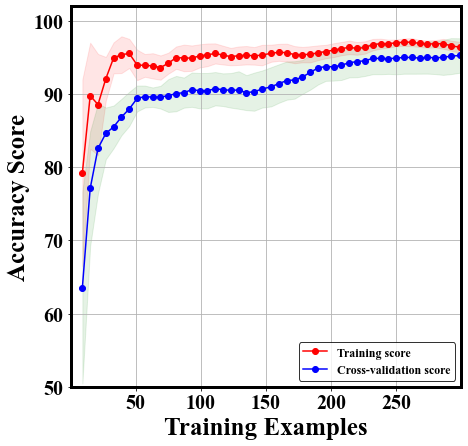

In [42]:
cv = cv_method
plot_learning_curve(kn_hp, X,Y, ylim=(0.1, 1.01), cv=cv, n_jobs=-1)
plt.grid(True)
plt.xlim([0,300])
plt.ylim([50, 102])
plt.xticks(range(50, 300, 50))
#plt.savefig('learning curve KNN ADASYN.jpg',bbox_inches='tight', dpi=600)

In [16]:
clf = OneVsRestClassifier(kn_hp)
clf.fit(x_train1, y_train1)
predicted_probas = clf.predict_proba(x_test1)

Text(0, 0.5, 'True Positive Rate')

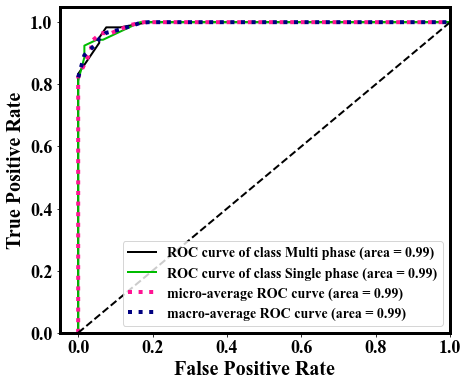

In [17]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test1, predicted_probas, title=None, text_fontsize=18, figsize=(7,6))
plt.legend(loc="lower right", fontsize= 14)
plt.xlim([-0.05, 1])
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=20)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=20)
#plt.savefig('AUC-ROC ADASYN KNN.JPG',dpi=600,bbox_inches='tight')

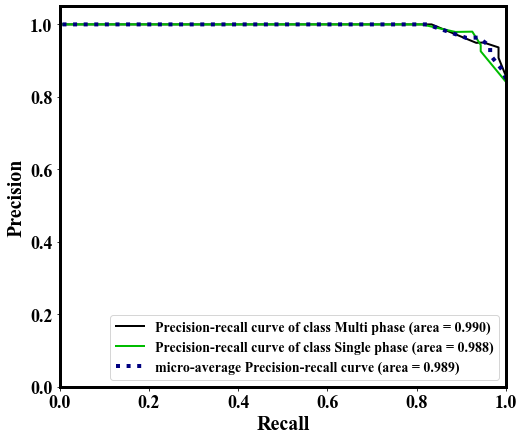

In [18]:
skplt.metrics.plot_precision_recall(y_test1, predicted_probas, title=None, text_fontsize=18, figsize=(8,7))
plt.xlim([0, 1])
plt.xlabel('Recall',fontweight='bold',fontsize=20)
plt.ylabel('Precision',fontweight='bold',fontsize=20)
plt.legend(loc="lower right", fontsize= 14)
#plt.savefig('Precision Recall ADASYN KNN.JPG',dpi=600,bbox_inches='tight')

# Classification reports and confusion matrix

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


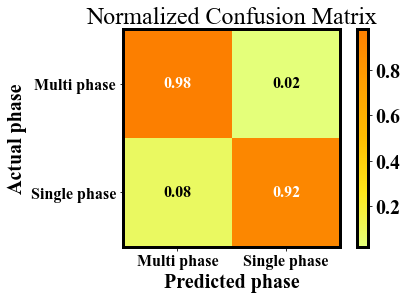

In [69]:
model=kn_hp
model.fit(x_train1, y_train1)
y_pred = model.predict(x_test1)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred, normalize=True, title=None, text_fontsize=16,cmap='Wistia')
plt.xlabel('Predicted phase',fontweight='bold',fontsize=20)
plt.ylabel('Actual phase',fontweight='bold',fontsize=20)
plt.savefig('Confusion matrix ADASYN KNN.jpg',bbox_inches='tight', dpi=600)

In [22]:
f1_score(y_test1, y_pred, average='weighted')

0.9556474342988983

# Prediction for Ternary Plots

In [5]:
train=pd.read_excel("Final Training data after ADASYN.xlsx")
test=pd.read_excel("Final Test data after ADASYN.xlsx")

In [6]:
x_train=train[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y_train=train[["Formation"]]
x_test=test[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y_test=test[["Formation"]]

In [7]:
names=["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']

In [8]:
sc=StandardScaler()

In [30]:
x_train1=pd.DataFrame(sc.fit_transform(x_train),columns=names[0:6])
x_train1
x_test1=pd.DataFrame(sc.fit_transform(x_test),columns=names[0:6])

In [10]:
model=KNeighborsClassifier(n_neighbors=6, metric='euclidean', weights='uniform')

In [21]:
model.fit(x_train1, y_train)

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [11]:
Pred=pd.read_excel("Quinary PS diagram.xlsx")
Pred

,NbTiZr,Hf,Ta,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing
0,0.96,0.02,0.02,2.649720,0.451613,1.065136,0.042532,2.667210,10.394513
1,0.94,0.02,0.04,2.643124,0.451613,1.064904,0.042150,2.667935,10.789579
2,0.94,0.04,0.02,2.651774,0.451613,1.068904,0.042759,2.665679,10.789579
3,0.92,0.02,0.06,2.636529,0.451613,1.064672,0.041764,2.666473,11.094100
4,0.92,0.04,0.04,2.645179,0.451613,1.068672,0.042387,2.669065,11.181106
...,...,...,...,...,...,...,...,...,...
1171,0.02,0.88,0.10,2.711695,0.451613,1.226232,0.021351,1.160795,3.682791
1172,0.02,0.90,0.08,2.720345,0.451613,1.230232,0.019706,0.968747,3.301435
1173,0.02,0.92,0.06,2.728995,0.451613,1.234232,0.017827,0.767099,2.874370
1174,0.02,0.94,0.04,2.737645,0.451613,1.238232,0.015629,0.555851,2.387187


In [13]:
Xnew=Pred[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
Xnew

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing
0,2.649720,0.451613,1.065136,0.042532,2.667210,10.394513
1,2.643124,0.451613,1.064904,0.042150,2.667935,10.789579
2,2.651774,0.451613,1.068904,0.042759,2.665679,10.789579
3,2.636529,0.451613,1.064672,0.041764,2.666473,11.094100
4,2.645179,0.451613,1.068672,0.042387,2.669065,11.181106
...,...,...,...,...,...,...
1171,2.711695,0.451613,1.226232,0.021351,1.160795,3.682791
1172,2.720345,0.451613,1.230232,0.019706,0.968747,3.301435
1173,2.728995,0.451613,1.234232,0.017827,0.767099,2.874370
1174,2.737645,0.451613,1.238232,0.015629,0.555851,2.387187


In [14]:
Xnew=pd.DataFrame(sc.fit_transform(Xnew))
Xnew

,0,1,2,3,4,5
0,0.795329,-1.0,-1.246613,1.372698,0.588058,0.101521
1,0.721589,-1.0,-1.251834,1.304697,0.589461,0.255101
2,0.818303,-1.0,-1.161821,1.413293,0.585095,0.255101
3,0.647848,-1.0,-1.257054,1.235766,0.586631,0.373483
4,0.744563,-1.0,-1.167042,1.346956,0.591647,0.407306
...,...,...,...,...,...,...
1171,1.488270,-1.0,2.378550,-2.406026,-2.326930,-2.507635
1172,1.584985,-1.0,2.468563,-2.699424,-2.698553,-2.655886
1173,1.681700,-1.0,2.558575,-3.034698,-3.088751,-2.821906
1174,1.778414,-1.0,2.648588,-3.426775,-3.497527,-3.011296


In [19]:
ynew = model.predict_proba(Xnew)

In [20]:
ynew
dfypred = pd.DataFrame(ynew)
dfypred.to_excel("Quinary pred for phase stability diagram predict proba.xlsx")

In [18]:
ypred=model.predict(Xnew)
dfpred = pd.DataFrame(ypred)
dfpred

,0
0,0
1,0
2,0
3,0
4,0
...,...
1171,0
1172,0
1173,0
1174,0


In [ ]:
dfpred.to_excel("Ternary pred for phase stability diagram.xlsx")